<center><h1>Using Gaussian processes to create forecasts and reports<h1></center>
 <center><img src="../AC_logo.png"></center>

## Using modules, functions and arrays

In [1]:
import numpy as np

AnArray = np.array([0,1,2,3,4])
AnotherArray = np.arange(0,10,2)

print(AnArray)
print(AnotherArray)

[0 1 2 3 4]
[0 2 4 6 8]


## Import required modules

In [1]:
# Two modules included with anaconda distribution

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Bespoke modules created using pyro to perform the Gaussian processes and then create reports.

import Forecasting
import CreatePDF

## Load in the data

In [2]:
# Loading in VCI data

Data = np.load('..\Data\VCI_Time_Series.npz',allow_pickle=True)

# Picking a county to run the GP on 

County = 'Garissa'

# Making sure each array has the correct format

Dates,VCI1W,VCI3M = np.array(Data[County][0],dtype=object),np.array(Data[County][2],dtype=float),np.array(Data[County][3],dtype=float)

# Loading in the errors to be used. We shall be forecasting up to 10 weeks.

Errors = np.load('..\Data\Errors.npz')

CountyErrors = Errors[County][:11]


## Visualising the data


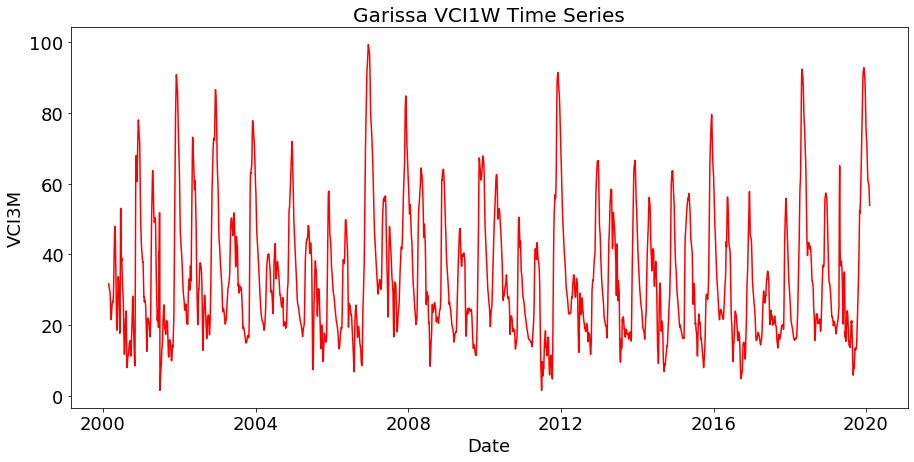

In [3]:
# List comprehension to change the format of the dates (Easier for plotting)

PlottingDates = [dt.datetime.strptime(date, "%d-%m-%Y").date() for date in Dates.tolist()]

# A more simple plotting code

# Setting the size for the plot

plt.figure(figsize=(15,7)) 

# Plotting the data and setting the colour and style of the line

plt.plot(PlottingDates,VCI1W,color='r',linestyle='-')

#Setting the size of the text on the x and y axis
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('VCI3M',size=18)
plt.xlabel('Date',size=18)
plt.title(County+ ' VCI1W Time Series',size=20)
plt.show()

## Changing the county

In [4]:
# This cell simply goes through the file and shows what counties can be chosen.
# Simply copy and paste the county wanted into the cell above.

Counties = [] 
for item in Data:
    Counties.append(item)
print(Counties)

['Mombasa', 'Kwale', 'Kilifi', 'TanaRiver', 'Lamu', 'TaitaTaveta', 'Garissa', 'Wajir', 'Mandera', 'Marsabit', 'Isiolo', 'Meru', 'TharakaNithi', 'Embu', 'Kitui', 'Machakos', 'Makueni', 'Nyandarua', 'Nyeri', 'Kirinyaga', 'Muranga', 'Kiambu', 'Turkana', 'WestPokot', 'Samburu', 'TransNzoia', 'UasinGishu', 'ElgeyoMarakwet', 'Nandi', 'Baringo', 'Laikipia', 'Nakuru', 'Narok', 'Kajiado', 'Kericho', 'Bomet', 'Kakamega', 'Vihiga', 'Bungoma', 'Busia', 'Siaya', 'Kisumu', 'HomaBay', 'Migori', 'Kisii', 'Nyamira', 'Nairobi']


## Run the GP 


In [5]:
PredictionDates,WeeklyDates,WeeklyVCI3M,PredictedValues = Forecasting.GetForecastVCI(Dates,VCI1W,VCI3M)

## Plot the forecast and the error

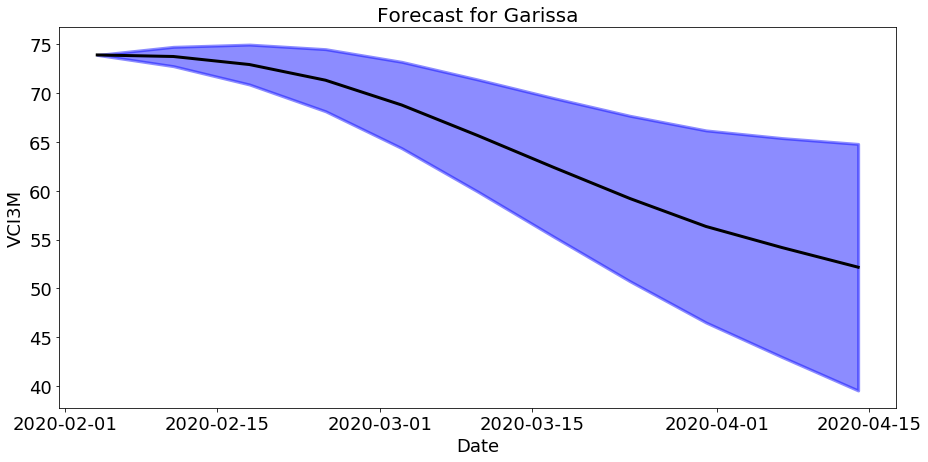

In [6]:
# Slightly fancier code to plot. 

# Adjusting the figure size

fig,ax1 = plt.subplots(figsize=(15,7))

# Shading in the graph to represent the possible error on the forecast. (95% confidence interval)

ax1.fill_between(PredictionDates, PredictedValues-CountyErrors, PredictedValues+CountyErrors,lw=3,
                 color='blue',alpha=0.45)

# Plotting the actual forecast line

ax1.plot(PredictionDates,PredictedValues,linestyle = '-' ,lw = 3, color = 'black')

# Setting the title

ax1.set_title('Forecast for ' + County,size=20)

# Labeling the axes

ax1.set_ylabel('VCI3M',size=18)
ax1.set_xlabel('Date',size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.show()

# Create the PDF report

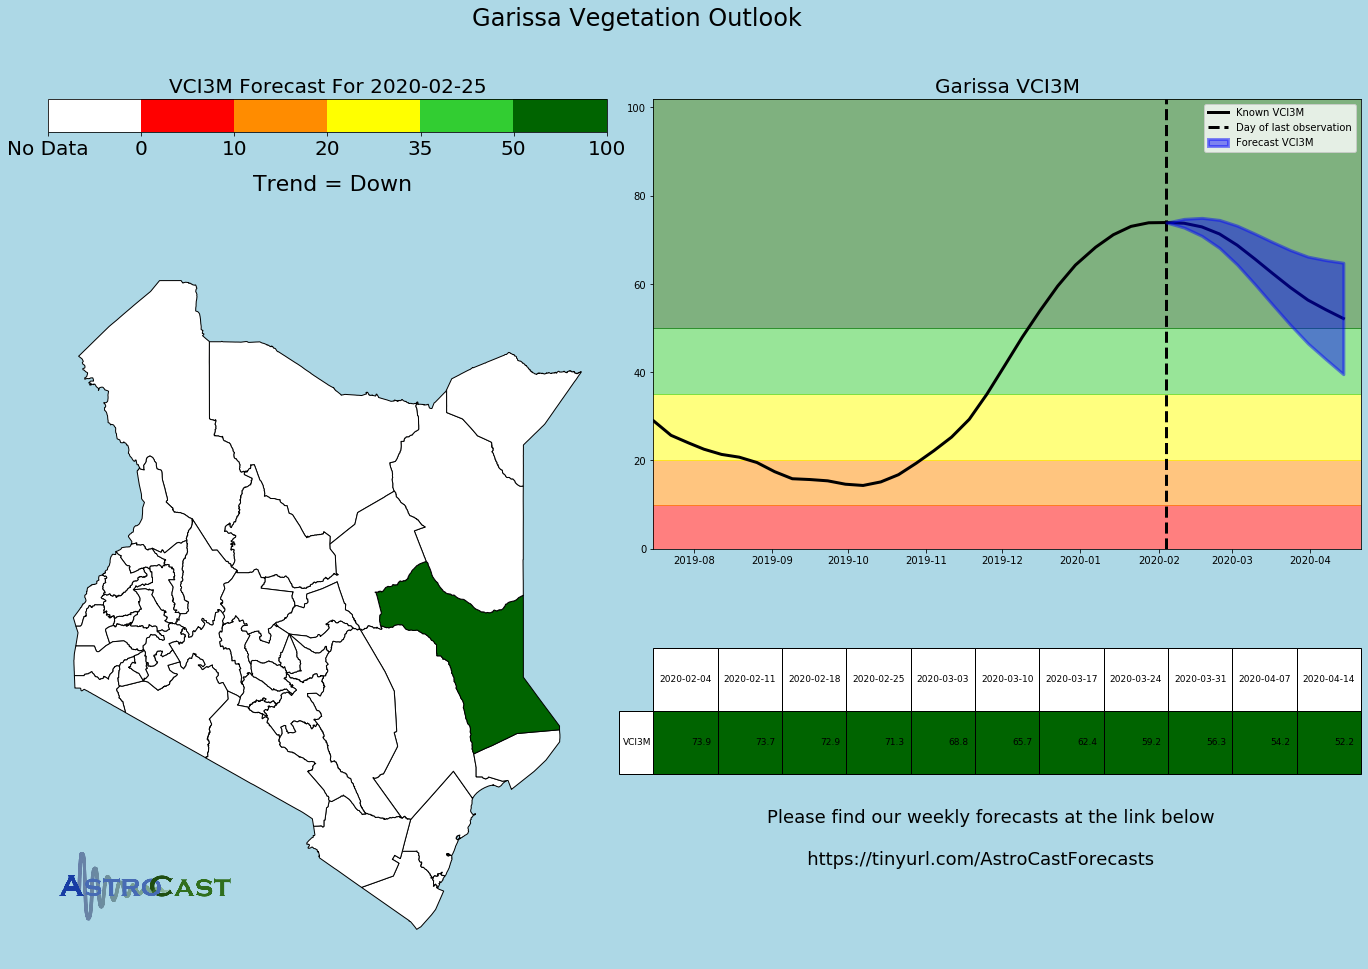

In [7]:
CreatePDF.PDF(PredictionDates,PredictedValues,WeeklyDates,WeeklyVCI3M,CountyErrors,County)